How many companies do you want to rank:2
Enter keyword/Tag to search about:tcs
Enter how many tweets to search:300
How peoples are reacting on tcs by analyzing 300 tweets.


Generate Report :
Weakly Positive


Detailed Report :-
33.33 % people thought it was positive.
9.33 % people thought it was weakly positive.
1.67 % people thought it was strongly positive.
0.67 % people thought it was negative.
3.33 % people thought it was weakly negative.
1.33 % people thought it was strongly negative.
50.33 % people thought it was neutral.


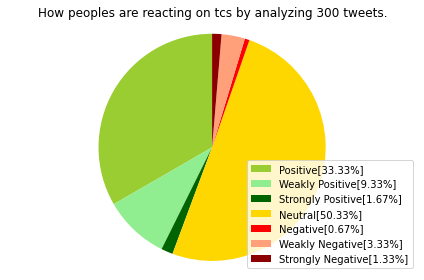

Enter keyword/Tag to search about:ibm
Enter how many tweets to search:300
How peoples are reacting on ibm by analyzing 300 tweets.


Generate Report :
Weakly Positive


Detailed Report :-
20.67 % people thought it was positive.
29.33 % people thought it was weakly positive.
2.00 % people thought it was strongly positive.
1.67 % people thought it was negative.
6.00 % people thought it was weakly negative.
0.33 % people thought it was strongly negative.
39.33 % people thought it was neutral.


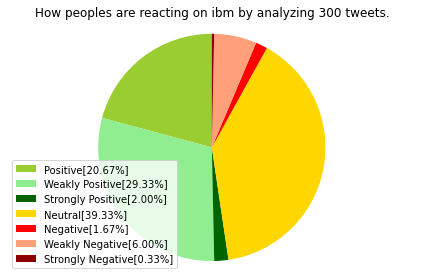

197.68999999999997
Company  Rating Points
    ibm         197.69


In [1]:
import pandas as pd
import sys,tweepy,csv,re
from textblob import TextBlob
import matplotlib.pyplot as plt, mpld3
from threading import Thread
import time

class RealtimeAnalysis:
    def __init__(self):
        self.tweets = []
        self.tweetText = []
        
    def DownloadData(self):
        #Authenticate
        consumerKey='kdsDgZ4Lujls2r7K7GgnvEzB8'
        consumerSecret = 'akoHsmzDh6uKtZsFmeIPbAY8Nv6tvDGOWMQEn8BPyCZnArB7N4'
        accessToken = '1354488656556404742-QMvvjomwjeXsunYhcIFLZRyrsfQ8Bw'
        accessTokenSecret = 'GeglIfFNx6228GK2eh6nvgaLHy4lB5HRBHRWfh9FL6Bt6'
        
        auth = tweepy.OAuthHandler(consumerKey,consumerSecret)
        auth.set_access_token(accessToken,accessTokenSecret)
        
        api = tweepy.API(auth)
        
        dict1 = {}
        
        n = int(input('How many companies do you want to rank:'))
        for i in range(n):
            #input for term to be searched and how many tweets to search
            searchTerm = input("Enter keyword/Tag to search about:")
            NoOfTerms = int(input('Enter how many tweets to search:'))
            
            #searching for tweets
            self.tweets = tweepy.Cursor(api.search, q=searchTerm, lang="en").items(NoOfTerms)
            
            #Open/create file to append data to
            csvFile = open('result.csv','a')
            
            #Use csv writer
            csvWriter = csv.writer(csvFile)
            
            #creating some variable to store info
            polarity = 0
            positive = 0
            wpositive = 0
            spositive = 0
            negative = 0
            wnegative = 0
            snegative = 0
            neutral = 0
            
            #iterating through tweets fetched for tweet in  self.tweets
            for tweet in self.tweets:
                #Append to temp so that we can store in csv later. using encode UTF-8
                self.tweetText.append(self.cleanTweet(tweet.text).encode('utf-8'))
               
                #print tweet's text
                #print(tweet.text.translate(non_bmp_map))
                
                
                analysis = TextBlob(tweet.text)
                #print(analysis.sentiment)
                
                #print tweet's polarity
                polarity += analysis.sentiment.polarity
                
                #adding up polarities to find the average later
                
                if(analysis.sentiment.polarity == 0):
                    #aading the reaction of how people are reacting to find average
                    neutral +=1
                elif(analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                    wpositive +=1
                elif(analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                    positive +=1
                elif(analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                    spositive +=1
                elif(analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                    wnegative +=1
                elif(analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                    negative +=1
                elif(analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                    snegative +=1
                    
            #write to csv and close csv file
            csvWriter.writerow(self.tweetText)
            csvFile.close
            
            #Finding  average of how peoples are reacting
            positive = self.percentage(positive, NoOfTerms)
            wpositive = self.percentage(wpositive, NoOfTerms)
            spositive = self.percentage(spositive, NoOfTerms)
            negative = self.percentage(negative, NoOfTerms)
            wnegative = self.percentage(wnegative, NoOfTerms)
            snegative = self.percentage(snegative, NoOfTerms)
            neutral = self.percentage(neutral, NoOfTerms)
            
            #Finding the average reaction
            polarity = polarity / NoOfTerms
            
            #Printing out data
            print("How peoples are reacting on "+searchTerm+" by analyzing "+str(NoOfTerms)+" tweets.")
            print("\n")
            print("Generate Report :")
            if(polarity==0):
                print("Neutral")
            elif(polarity > 0 and polarity <= 0.3):
                print("Weakly Positive")
            elif(polarity > 0.3 and polarity <= 0.6):
                print("Positive")
            elif(polarity > 0.6 and polarity <= 1):
                print("Strongly Positive")
            elif(polarity > -0.3 and polarity <= 0):
                print("Weakly Negative")
            elif(polarity > -0.6 and polarity <= -0.3):
                print("Negative")
            elif(polarity > -1 and polarity <= 0.6):
                print("Strongly Negative")
                
            print("\n")
            print("Detailed Report :-")
            print(str(positive)+" % people thought it was positive.")
            print(str(wpositive)+" % people thought it was weakly positive.")
            print(str(spositive)+" % people thought it was strongly positive.")
            print(str(negative)+" % people thought it was negative.")
            print(str(wnegative)+" % people thought it was weakly negative.")
            print(str(snegative)+" % people thought it was strongly negative.")
            print(str(neutral)+" % people thought it was neutral.")
            
            self.plotPieChart(positive,wpositive,spositive,negative,wnegative,snegative,neutral,searchTerm,NoOfTerms)        
            
        sum = float(positive)*5+float(wpositive)*2+float(spositive)*10+float(neutral)-float(negative)*5-float(wnegative)*2-float(snegative)*10 
        print(sum)
        dict1.update({searchTerm:sum})
        st = sorted(dict1.items(), key = lambda kv:(kv[1],kv[0]),reverse=True)
        df = pd.DataFrame(st,columns=["Company","Rating Points"])
        print(df.to_string(index=False))
            
    def plotPieChart(self,positive,wpositive,spositive,negative,wnegative,snegative,neutral,searchTerm,noOfSearchTerms):
            labels = ["Positive["+str(positive)+"%]", "Weakly Positive["+str(wpositive)+"%]", "Strongly Positive["+str(spositive)+"%]", "Neutral["+str(neutral)+"%]", "Negative["+str(negative)+"%]", "Weakly Negative["+str(wnegative)+"%]","Strongly Negative["+str(snegative)+"%]"] 
            sizes = [positive,wpositive,spositive,neutral,negative,wnegative,snegative]
            colors =['yellowgreen','lightgreen','darkgreen','gold','red','lightsalmon','darkred']
            patches, texts = plt.pie(sizes, colors=colors, startangle=90)
            plt.legend(patches, labels, loc='best')
            plt.title("How peoples are reacting on "+searchTerm+" by analyzing "+str(noOfSearchTerms)+" tweets.")
            plt.axis('equal')
            plt.tight_layout()
            plt.show()
            
    def percentage(self,part,whole):
            temp = 100 * float(part) / float(whole)
            return format(temp,'.2f')
        
    def cleanTweet(self,tweet):
            #Remove Links,Special characters....etc from tweet
            return ''.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w +:\ / \ / \S +)"," ",tweet).split())
        
if __name__ == "__main__":
    sa = RealtimeAnalysis()
    sa.DownloadData()